<a href="https://colab.research.google.com/github/MaryamCodeHub/crypto-rollercoaster/blob/main/The_Crypto_Rollercoaster_Bitcoin_Price_vs_Public_Interest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LIBRARIES SETUP**

In [24]:
!pip install pandas yfinance matplotlib seaborn plotly
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files
import io
import numpy as np
from datetime import datetime

In [25]:
# Some Styling settings

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [14, 8]

# **DATA COLLECTION**

In [44]:
print(" Loading data for our crypto investigation...")

# Google Trends Data
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
trends_data = pd.read_csv(io.BytesIO(uploaded[file_name]), skiprows=1)
trends_data.columns = ['Date', 'Search_Interest']
trends_data['Date'] = pd.to_datetime(trends_data['Date'])
trends_data = trends_data.set_index('Date')

# Bitcoin Price Data
start_date = '2021-01-01'
end_date = '2023-12-31'
btc_data = yf.download('BTC-USD', start=start_date, end=end_date, progress=False)
btc_price = btc_data['Close']

# Merging both datasets
combined_df = pd.concat([btc_price, trends_data['Search_Interest']], axis=1)
combined_df.columns = ['BTC_Price', 'Search_Interest']
combined_df = combined_df.dropna()

print("✅ All data loaded successfully!")
print(f"Dataset shape: {combined_df.shape}")

 Loading data for our crypto investigation...


Saving multiTimeline.csv to multiTimeline (3).csv
✅ All data loaded successfully!
Dataset shape: (156, 2)


/tmp/ipython-input-1675971624.py:14: FutureWarning:

YF.download() has changed argument auto_adjust default to True



#  Question 1:   **"RELATIONSHIP OVER TIME"**


In [45]:
print("\n" + "="*80)
print("QUESTION 1: How does Bitcoin price relate to public search interest over time?")
print("="*80)

fig1 = make_subplots(specs=[[{"secondary_y": True}]])

fig1.add_trace(go.Scatter(x=combined_df.index, y=combined_df['BTC_Price'],
                         name="Bitcoin Price", line=dict(color='#FF6B6B', width=3)),
              secondary_y=False)

fig1.add_trace(go.Scatter(x=combined_df.index, y=combined_df['Search_Interest'],
                         name="Search Interest", line=dict(color='#45B7D1', width=3)),
              secondary_y=True)

fig1.update_layout(
    title='<b>The Crypto Pulse: Price vs Public Curiosity</b><br>When markets move, people search',
    template='plotly_white',
    height=500,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig1.update_xaxes(title_text="Timeline (2021-2023)")
fig1.update_yaxes(title_text="<b>Bitcoin Price</b> (USD)", secondary_y=False)
fig1.update_yaxes(title_text="<b>Search Interest</b> (0-100 scale)", secondary_y=True)

fig1.show()


QUESTION 1: How does Bitcoin price relate to public search interest over time?


# Question 2:   **CORRELATION STRENGTH**



QUESTION 2: How strong is the relationship between price and search interest?


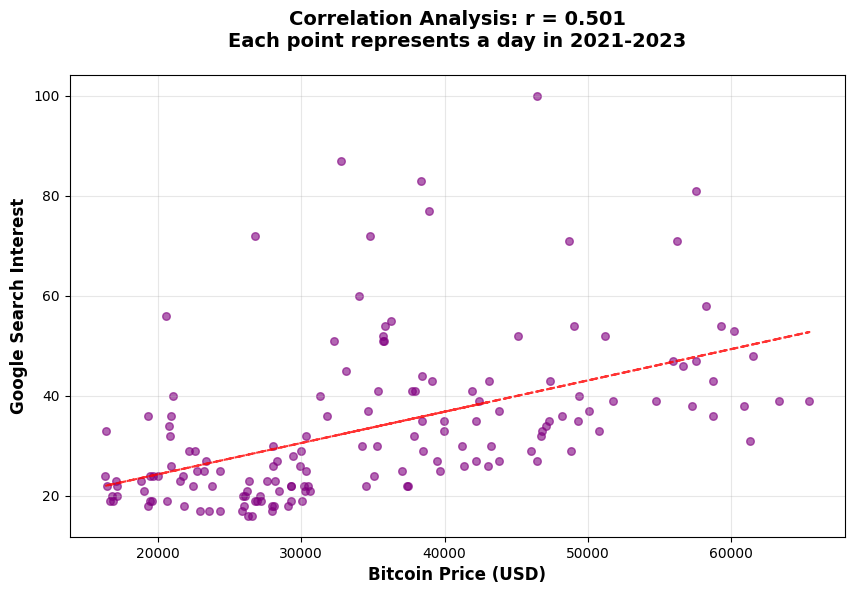

Correlation coefficient: 0.501
Insight: Moderate positive relationship - Some connection exists


In [46]:
print("\n" + "="*80)
print("QUESTION 2: How strong is the relationship between price and search interest?")
print("="*80)

# Calculating correlation
correlation = combined_df['BTC_Price'].corr(combined_df['Search_Interest'])

# Creating correlation visualization
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['BTC_Price'], combined_df['Search_Interest'],
           alpha=0.6, color='purple', s=30)

# Adding trendline
z = np.polyfit(combined_df['BTC_Price'], combined_df['Search_Interest'], 1)
p = np.poly1d(z)
plt.plot(combined_df['BTC_Price'], p(combined_df['BTC_Price']), "r--", alpha=0.8)

plt.xlabel('Bitcoin Price (USD)', fontweight='bold', fontsize=12)
plt.ylabel('Google Search Interest', fontweight='bold', fontsize=12)
plt.title(f'Correlation Analysis: r = {correlation:.3f}\nEach point represents a day in 2021-2023',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Correlation coefficient: {correlation:.3f}")
if correlation > 0.7:
    print("Insight: Very strong positive relationship - People search more when price rises!")
elif correlation > 0.3:
    print("Insight: Moderate positive relationship - Some connection exists")
else:
    print(" Insight: Weak relationship - Other factors might be influencing searches")

# Q3: **YEARLY COMPARISON**



QUESTION 3: Which year showed the strongest relationship?


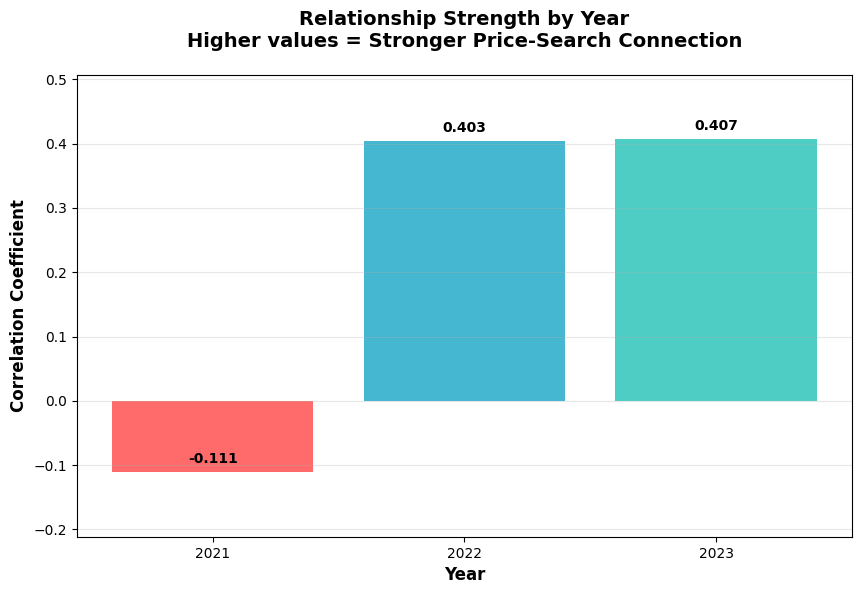

In [36]:
print("\n" + "="*70)
print("QUESTION 3: Which year showed the strongest relationship?")
print("="*70)

yearly_data = []
years = [2021, 2022, 2023]

for year in years:
    year_df = combined_df[combined_df.index.year == year]
    if len(year_df) > 0:
        corr = year_df['BTC_Price'].corr(year_df['Search_Interest'])
        yearly_data.append({'Year': year, 'Correlation': corr})

yearly_df = pd.DataFrame(yearly_data)

# Creating bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_df['Year'].astype(str), yearly_df['Correlation'],
               color=['#FF6B6B', '#45B7D1', '#4ECDC4'])

# Adding value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Correlation Coefficient', fontweight='bold', fontsize=12)
plt.title('Relationship Strength by Year\nHigher values = Stronger Price-Search Connection',
          fontsize=14, fontweight='bold', pad=20)
plt.ylim(min(yearly_df['Correlation']) - 0.1, max(yearly_df['Correlation']) + 0.1)
plt.grid(True, alpha=0.3, axis='y')
plt.show()


# Q4: **PEAK ANALYSIS**



QUESTION 4: When did peak interest and peak price occur?


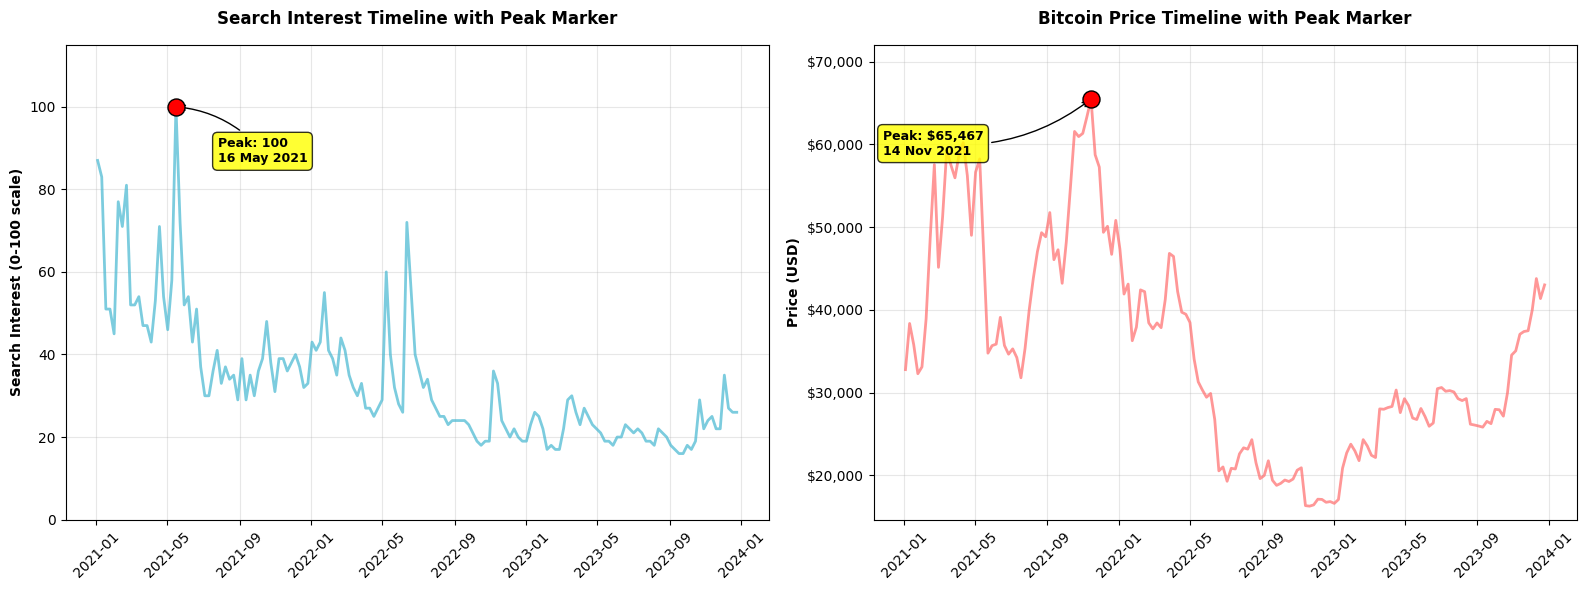

📅 Peak Search Interest: 100/100 on 2021-05-16
📅 Peak Bitcoin Price: $65,467 on 2021-11-14
 Time between peaks: 182 days
Historical Context: May 2021 peak coincided with Elon Musk's Tesla Bitcoin announcement


In [48]:
print("\n" + "="*60)
print("QUESTION 4: When did peak interest and peak price occur?")
print("="*60)

# Finding peaks
peak_search = combined_df['Search_Interest'].max()
peak_price = combined_df['BTC_Price'].max()
peak_search_date = combined_df['Search_Interest'].idxmax()
peak_price_date = combined_df['BTC_Price'].idxmax()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

search_x_pos = -100 if peak_search_date.month > 6 else 30
price_x_pos = -150 if peak_price_date.month > 6 else 30

# Peak Search Interest
ax1.plot(combined_df.index, combined_df['Search_Interest'], color='#45B7D1', alpha=0.7, linewidth=2)
ax1.scatter(peak_search_date, peak_search, color='red', s=150, zorder=5, edgecolors='black')

search_y_offset = -40 if peak_search > 50 else 40

ax1.annotate(f'Peak: {peak_search:.0f}\n{peak_search_date.strftime("%d %b %Y")}',
             xy=(peak_search_date, peak_search),
             xytext=(search_x_pos, search_y_offset),
             textcoords='offset points',
             fontweight='bold', fontsize=9,  #
             bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.8),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='black'))

ax1.set_title('Search Interest Timeline with Peak Marker', fontweight='bold', fontsize=12, pad=15)
ax1.set_ylabel('Search Interest (0-100 scale)', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Setting y-axis limits to create space for annotation
ax1.set_ylim(0, max(combined_df['Search_Interest']) * 1.15)

# Peak Price
ax2.plot(combined_df.index, combined_df['BTC_Price'], color='#FF6B6B', alpha=0.7, linewidth=2)
ax2.scatter(peak_price_date, peak_price, color='red', s=150, zorder=5, edgecolors='black')

price_y_offset = -40 if peak_price > combined_df['BTC_Price'].median() else 40

ax2.annotate(f'Peak: ${peak_price:,.0f}\n{peak_price_date.strftime("%d %b %Y")}',
             xy=(peak_price_date, peak_price),
             xytext=(price_x_pos, price_y_offset),
             textcoords='offset points',
             fontweight='bold', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.8),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='black'))

ax2.set_title('Bitcoin Price Timeline with Peak Marker', fontweight='bold', fontsize=12, pad=15)
ax2.set_ylabel('Price (USD)', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Formating y-axis for price
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

ax2.set_ylim(min(combined_df['BTC_Price']) * 0.9, max(combined_df['BTC_Price']) * 1.1)

plt.tight_layout()
plt.show()

# Additional insights
print(f"📅 Peak Search Interest: {peak_search:.0f}/100 on {peak_search_date.strftime('%Y-%m-%d')}")
print(f"📅 Peak Bitcoin Price: ${peak_price:,.0f} on {peak_price_date.strftime('%Y-%m-%d')}")

# Time difference between peaks
time_diff = abs((peak_search_date - peak_price_date).days)
print(f" Time between peaks: {time_diff} days")

if '2021-05' in peak_search_date.strftime('%Y-%m'):
    print("Historical Context: May 2021 peak coincided with Elon Musk's Tesla Bitcoin announcement")
elif '2021-11' in peak_price_date.strftime('%Y-%m'):
    print(" Historical Context: Nov 2021 peak was during Bitcoin's all-time high rally")

# Q5: **LEAD-LAG ANALYSIS**



UESTION 5: Does price lead search interest or vice versa?


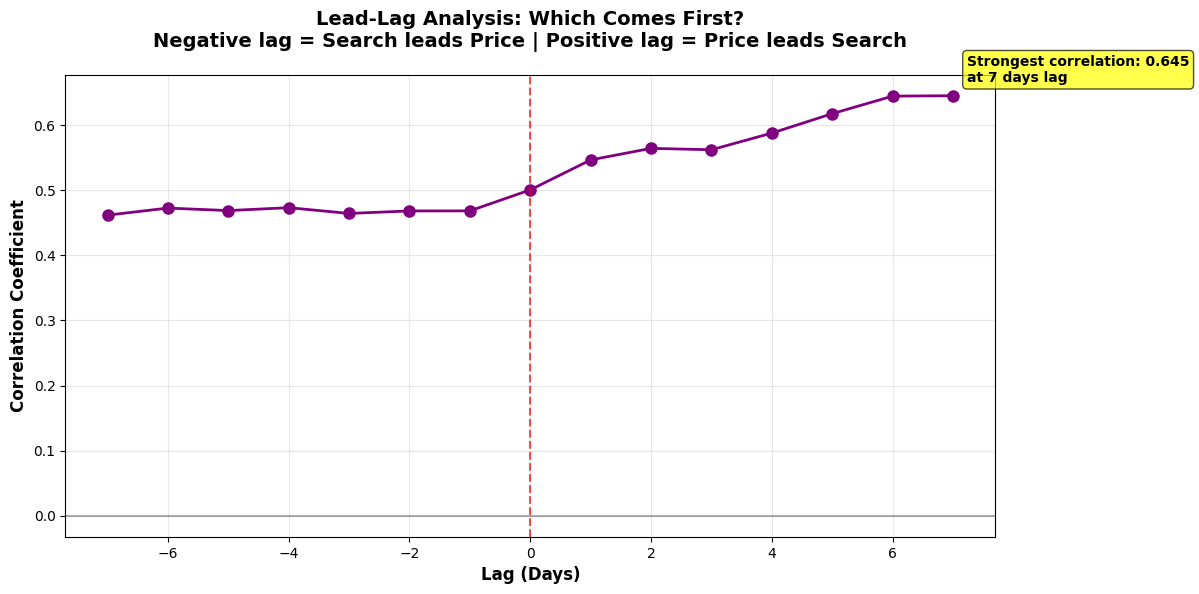

Analysis complete! All questions answered through visual storytelling.


In [49]:
print("\n" + "="*60)
print("UESTION 5: Does price lead search interest or vice versa?")
print("="*60)

# Create lag analysis
lags = range(-7, 8)  # -7 to +7 days
correlations = []

for lag in lags:
    if lag < 0:
        # Search leads price
        corr = combined_df['Search_Interest'].shift(abs(lag)).corr(combined_df['BTC_Price'])
    elif lag > 0:
        # Price leads search
        corr = combined_df['BTC_Price'].shift(lag).corr(combined_df['Search_Interest'])
    else:
        # Same day
        corr = combined_df['BTC_Price'].corr(combined_df['Search_Interest'])
    correlations.append(corr)

# Plot lag analysis
plt.figure(figsize=(12, 6))
plt.plot(lags, correlations, marker='o', linewidth=2, markersize=8, color='purple')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.xlabel('Lag (Days)', fontweight='bold', fontsize=12)
plt.ylabel('Correlation Coefficient', fontweight='bold', fontsize=12)
plt.title('Lead-Lag Analysis: Which Comes First?\nNegative lag = Search leads Price | Positive lag = Price leads Search',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Annotate peak correlation
max_corr_idx = np.argmax(correlations)
plt.annotate(f'Strongest correlation: {correlations[max_corr_idx]:.3f}\nat {lags[max_corr_idx]} days lag',
             xy=(lags[max_corr_idx], correlations[max_corr_idx]),
             xytext=(10, 10), textcoords='offset points',
             fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.show()

print("Analysis complete! All questions answered through visual storytelling.")
